In [1]:
import sys, os
os.chdir('/home/koritskiy/rqc/ferrimagnet/')
from modules.energy import *
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure
from scipy import optimize

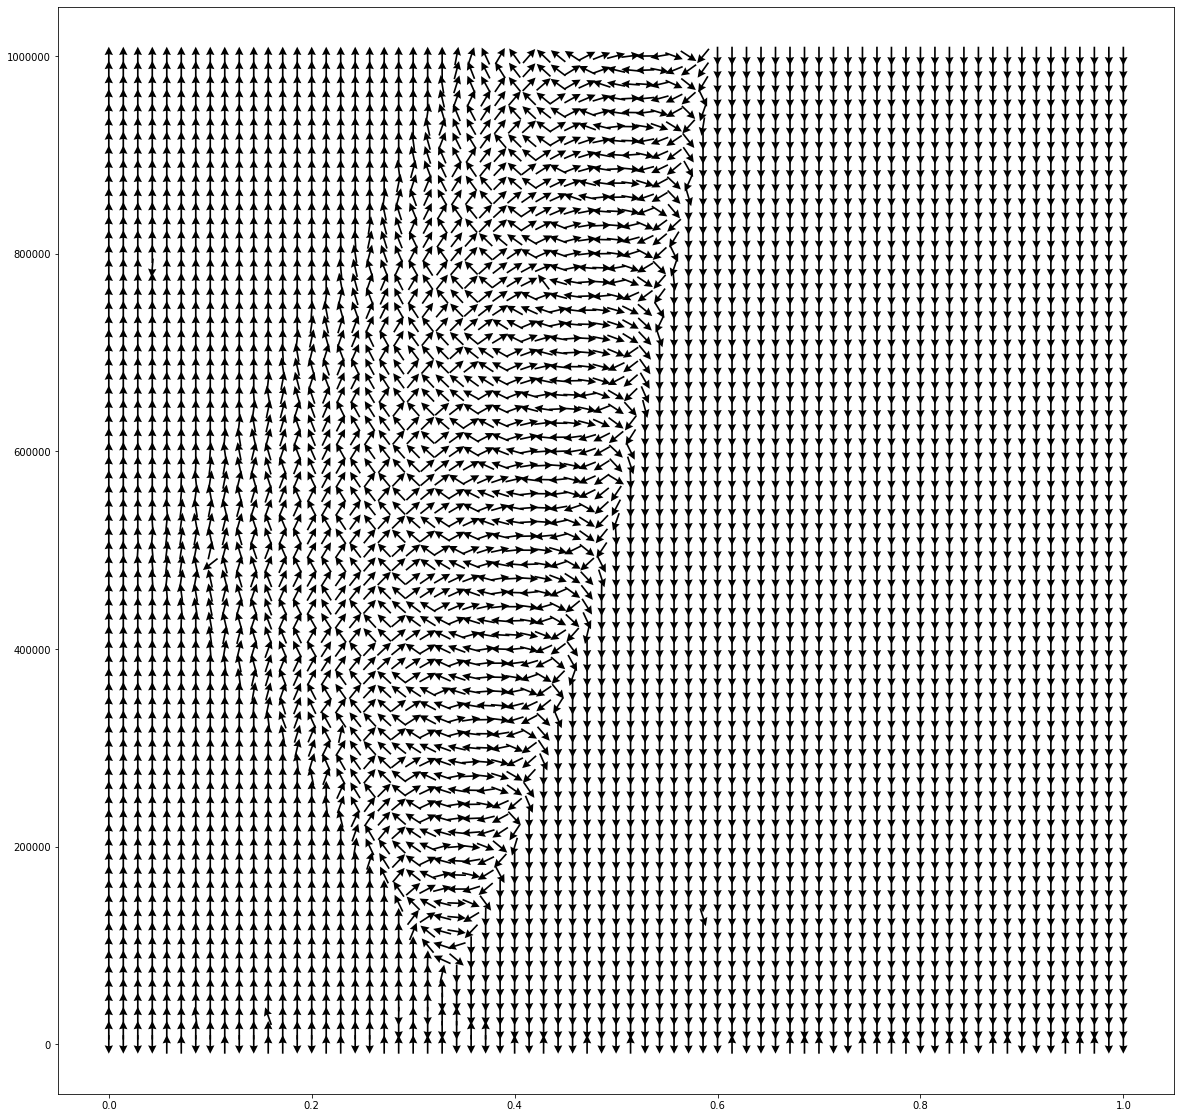

In [3]:
# Generate coordinate grid
N = 71
X = np.linspace(0, 1, N)
H = np.linspace(0, 10 ** 6, N)
XX, HH = np.meshgrid(X, H)
thetas = np.zeros((N, N))
# x and y numerates grid points, not coordinates
for x in range(len(X)):
    for h in range(len(H)):
        x0 = np.random.rand() * 2 * np.pi
        args = XX[x, h], HH[x, h]
        thetas[x, h ] = optimize.fmin_cg(energy,
                                        x0,
                                        fprime=denergy,
                                        args=args,
                                        disp=False)[0]


# Determine x and y projections of spins (H point  in "y" direction)
Md_x = np.sin(thetas)
Md_h = np.cos(thetas)

# fig, ax = plt.subplots()
plt.figure(figsize=(20,20))
plt.quiver(XX, HH, Md_x, Md_h, pivot='mid', scale=60, color='black', width=0.0015, headwidth=5)

In [15]:
args = [0.5, 2000]
energy(1, 0.1, 100000)

-0.6499708509231861